# Feedforward NEURAL NETWORK (Multilayer Perceptron (MLP)) MODEL BUILD

# Importing required libraries

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


# Load Train and Test Datasets

In [56]:
# Load Train & Test Datasets
df_train = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/train.csv')
df_test = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/test.csv')

# Extract Features & Target
X_train = df_train.drop(['binary_attack'], axis=1)
y_train = df_train['binary_attack']

X_test = df_test.drop(['binary_attack'], axis=1)
y_test = df_test['binary_attack']

# Split Training Data for Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Completed")
print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

Data Preprocessing Completed
Training Set: (100778, 42), Validation Set: (25195, 42), Test Set: (22544, 42)


#  Compute Gini Importance Using a Decision Tree

In [57]:
# Train a Random Forest classifier to compute Gini importance
# Initialize and Train Random Forest Classifier
rf_model = RandomForestClassifier(
                n_estimators=200, 
                max_depth=20, 
                min_samples_split=5, 
                min_samples_leaf=2, 
            #     max_features='sqrt', 
                random_state=42)

rf_model.fit(X_train, y_train)

# Extract feature importance (Gini importance)
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by="Gini Importance", ascending=False)

# Display feature importances
print(importance_df)

                        Feature  Gini Importance
4                     src_bytes         0.176335
5                     dst_bytes         0.113163
28                same_srv_rate         0.081293
41                        level         0.067184
33       dst_host_same_srv_rate         0.064912
29                diff_srv_rate         0.062584
3                          flag         0.055071
11                    logged_in         0.042574
22                        count         0.037175
1                 protocol_type         0.033860
32           dst_host_srv_count         0.030891
34       dst_host_diff_srv_rate         0.026206
24                  serror_rate         0.025947
38     dst_host_srv_serror_rate         0.025526
35  dst_host_same_src_port_rate         0.025447
2                       service         0.023447
36  dst_host_srv_diff_host_rate         0.015708
23                    srv_count         0.014834
31               dst_host_count         0.013825
25              srv_

# Extract Feature Importance (Gini Importance)

In [58]:
# Select the top N features based on Gini Importance
top_n = 14  # Adjust as needed
selected_features = importance_df.iloc[:top_n]['Feature'].values

# Filter dataset to only keep the selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

print(f"Filtered Training Set: {X_train_selected.shape}, Validation Set: {X_val_selected.shape}, Test Set: {X_test_selected.shape}")


Filtered Training Set: (100778, 14), Validation Set: (25195, 14), Test Set: (22544, 14)


# Visualizing Feature Importance

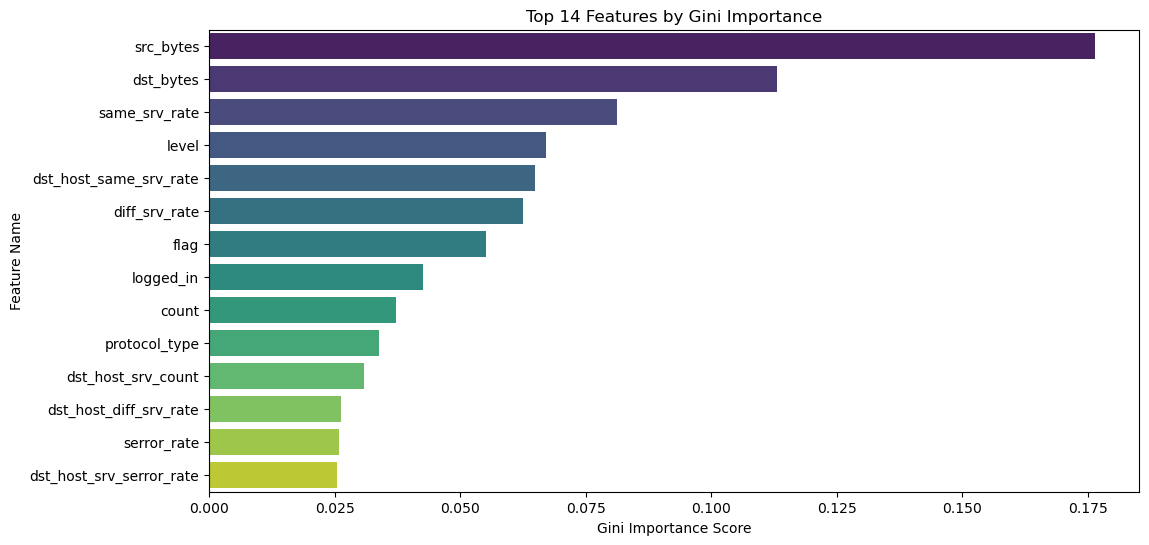

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gini Importance', y='Feature', data=importance_df.head(14), palette="viridis")
plt.title("Top 14 Features by Gini Importance")
plt.xlabel("Gini Importance Score")
plt.ylabel("Feature Name")
plt.show()

# Standardize the Selected Features

In [60]:
# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Track Computational Overhead Before Training

In [61]:
# Start Tracking System Metrics
cpu_before = psutil.cpu_percent(interval=None)
memory_before = psutil.virtual_memory().used / (1024 * 1024)  # Convert to MB
disk_before = psutil.disk_io_counters().read_bytes / (1024 * 1024)  # Convert to MB

# Start Timer for Training Overhead
training_start_time = time.time()

# Build Neural Network Model

In [62]:
# Define the neural network
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

/Users/mohammedabdulai/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 192 (768.00 B)

## Train the Model

In [63]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Train the model with class weights
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), 
          epochs=20, batch_size=32, verbose=2, class_weight=class_weight_dict)


Epoch 1/20
3150/3150 - 6s - 2ms/step - accuracy: 0.9777 - loss: 0.1146 - val_accuracy: 0.9910 - val_loss: 0.0492
Epoch 2/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9884 - loss: 0.0566 - val_accuracy: 0.9915 - val_loss: 0.0422
Epoch 3/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9893 - loss: 0.0483 - val_accuracy: 0.9924 - val_loss: 0.0358
Epoch 4/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9895 - loss: 0.0450 - val_accuracy: 0.9914 - val_loss: 0.0371
Epoch 5/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9900 - loss: 0.0435 - val_accuracy: 0.9928 - val_loss: 0.0344
Epoch 6/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9902 - loss: 0.0417 - val_accuracy: 0.9934 - val_loss: 0.0346
Epoch 7/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9909 - loss: 0.0406 - val_accuracy: 0.9915 - val_loss: 0.0363
Epoch 8/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9910 - loss: 0.0394 - val_accuracy: 0.9923 - val_loss: 0.0346
Epoch 9/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9909 - loss: 0.0404 - val_accuracy: 0.9914 - 

# Track Computational Overhead After Training

In [64]:
# End Timer for Training
training_end_time = time.time()
execution_time = training_end_time - training_start_time

# Track System Metrics After Training
cpu_after = psutil.cpu_percent(interval=None)
memory_after = psutil.virtual_memory().used / (1024 * 1024)
disk_after = psutil.disk_io_counters().read_bytes / (1024 * 1024)

# Compute Overhead Metrics
cpu_usage_change = cpu_after - cpu_before
memory_used = memory_after - memory_before
disk_io_used = disk_after - disk_before

print(f"🕒 Training Execution Time: {execution_time:.4f} seconds")

🕒 Training Execution Time: 100.7319 seconds


# Model Prediction (Test Set) & Compute Computational Overhead

In [65]:
# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
# print(f"Test Loss: {test_loss}")
# print("Test Accuracy:   {:.2%}".format(test_accuracy))



# Start Timer for Inference Overhead
inference_start_time = time.time()

# Predictions on Test Set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# End Timer for Inference
inference_end_time = time.time()
total_inference_time = inference_end_time - inference_start_time

# Compute Inference Time per Sample
inference_time = total_inference_time / len(X_test_scaled)

print(f"🕒 Total Inference Time: {total_inference_time:.4f} seconds")
print(f"⚡ Inference Time per Sample: {inference_time:.6f} seconds")


705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
🕒 Total Inference Time: 0.7507 seconds
⚡ Inference Time per Sample: 0.000033 seconds


# Analyze Results

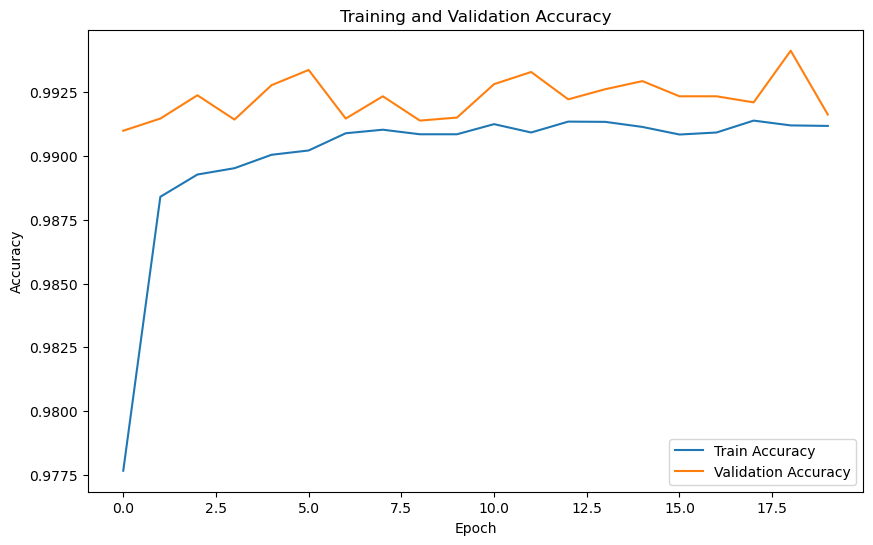

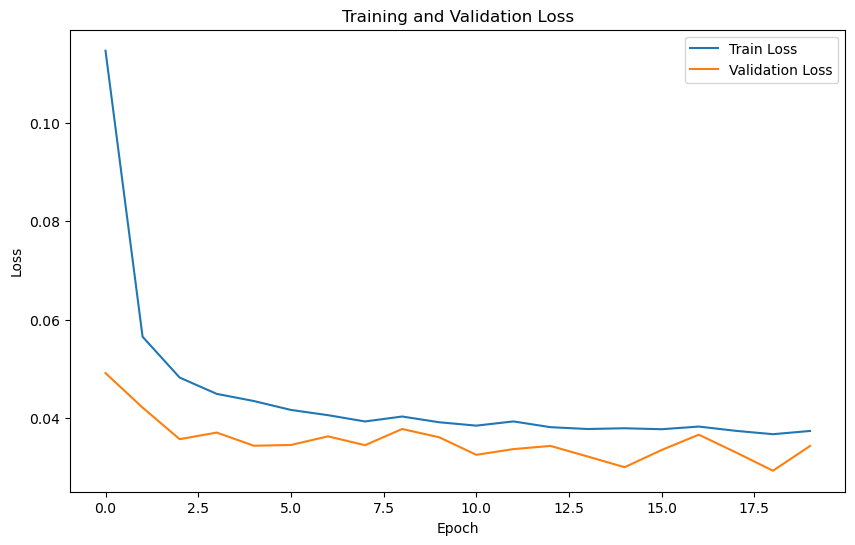

In [66]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Evaluation


🔍 Model Performance Metrics:
✅ Accuracy:   91.63%
✅ Precision:  86.24%
✅ Recall:     95.87%
✅ F1-score:   90.80%


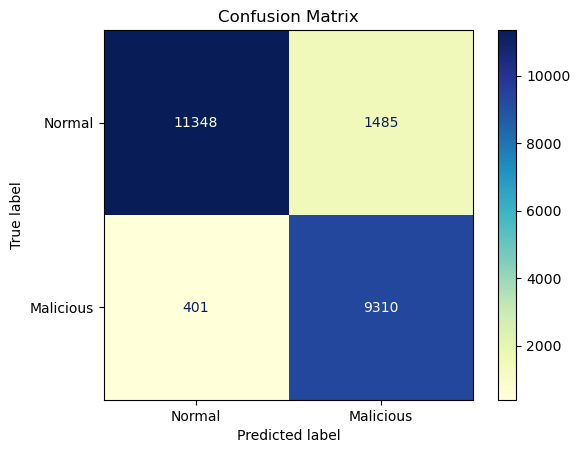

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     12833
           1       0.86      0.96      0.91      9711

    accuracy                           0.92     22544
   macro avg       0.91      0.92      0.92     22544
weighted avg       0.92      0.92      0.92     22544



In [67]:
# Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n🔍 Model Performance Metrics:")
print(f"✅ Accuracy:   {accuracy:.2%}")
print(f"✅ Precision:  {precision:.2%}")
print(f"✅ Recall:     {recall:.2%}")
print(f"✅ F1-score:   {f1:.2%}")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Malicious'])

disp.plot(cmap='YlGnBu', values_format='d')

plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Save Model & Full Computational Overhead Report

In [69]:
# Report Computational Overhead
print("\n🚀 **Computational Overhead Report** 🚀")
print(f"⏳ **Execution Time:** {execution_time:.4f} seconds")
print(f"🔥 **CPU Usage Change:** {cpu_usage_change:.2f}%")
print(f"💾 **Disk I/O Usage:** {disk_io_used:.2f} MB")
print(f"📊 **Peak Memory Usage:** {memory_used:.2f} MB")
print(f"⚡ **Inference Time per Sample:** {inference_time:.6f} seconds")

# Save Model for Future Use
model_folder = "../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/"
model_filename = "NSL-KDD_Neural_Network.joblib"
model_path = model_folder + model_filename

# Save using joblib
joblib.dump(model, model_path)
print(f"📁 Model saved to: {model_path}")

# Save Scaler
scaler_filename = "NSL-KDD_Scaler.pkl"
scaler_path = model_folder + scaler_filename
joblib.dump(scaler, scaler_path)
print(f"📁 Scaler saved to: {scaler_path}")



# Save selected features (from Gini Importance) for later use
selected_features_path = "../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/selected_features.pkl"

# Assume `selected_features` is the list of features used for training
joblib.dump(selected_features, selected_features_path)

print(f"✅ Selected features saved to: {selected_features_path}")




🚀 **Computational Overhead Report** 🚀
⏳ **Execution Time:** 100.7319 seconds
🔥 **CPU Usage Change:** 5.60%
💾 **Disk I/O Usage:** 58.36 MB
📊 **Peak Memory Usage:** 112.13 MB
⚡ **Inference Time per Sample:** 0.000033 seconds
📁 Model saved to: ../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/NSL-KDD_Neural_Network.joblib
📁 Scaler saved to: ../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/NSL-KDD_Scaler.pkl
✅ Selected features saved to: ../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/selected_features.pkl
